DEEP LEARNING CƠ BẢN

Xin chào các thành viên gen mới của FDS, chúc các bạn sẽ có một bài coding bổ ích về deep learning với tensorflow :D

Ở đây mình chỉ coding kèm giải thích một chút ít, lí thuyết các bạn nên thể xem ở trên youtube, coursera,...  về forward, backward, loss function, optimizer, activation function, ...


Trước tiên, chúng ta hãy cùng nói sơ qua về cấu trúc của mạng neural
- mạng neural là một mô hình học máy được lấy cảm hứng từ cấu trúc của não người, nó bao gồm các lớp neuron, mỗi lớp neuron sẽ nhận đầu vào từ các neuron ở lớp trước và truyền đầu ra cho các neuron ở lớp sau
- mỗi neuron sẽ nhận đầu vào là một vector, sau đó sẽ thực hiện một phép biến đổi tuyến tính và một phép biến đổi phi tuyến để tạo ra đầu ra

Oke, bây giờ mình sẽ nói qua về forward propagation và back propagation
- forward propagation: là quá trình tính toán giá trị đầu ra của mạng neural dựa trên giá trị đầu vào, hay còn gọi là dự đoán
- back propagation: là quá trình cập nhật các trọng số của mạng neural dựa trên sai số giữa giá trị dự đoán và giá trị thực tế

Nói qua về hàm kích hoạt ReLU, hàm kích hoạt này sẽ trả về giá trị của x nếu x > 0, ngược lại sẽ trả về 0, cụ thể như sau:
-ReLU(x) = x nếu x > 0
-ReLU(x) = 0 nếu x <= 0
-công thức: f(x) = max(0, x)
Cùng nhìn lại hàm forward propagation:
- giả sử mạng neural có 2 lớp, lớp 1 có 2 neuron, lớp 2 có 1 neuron và hàm kích hoạt là ReLU thì ta có công thức như sau:
- z1 = w1*x1 + w2*x2 + b1
- a1 = ReLU(z1)
- z2 = w3*a1 + w4*a2 + b2
- a2 = ReLU(z2)
- với x1, x2 là giá trị đầu vào, w1, w2, w3, w4 là trọng số, b1, b2 là bias, z1, z2 là giá trị trước khi áp dụng hàm kích hoạt, a1, a2 là giá trị sau khi áp dụng hàm kích hoạt
- giá trị cuối cùng của mạng neural sẽ là a2. Các trọng số được khởi tạo ngẫu nhiên trong khoảng [-1, 1], bias được khởi tạo bằng 0
- w1 và w3 là trọng số của lớp 1, w2 và w4 là trọng số của lớp 2
- lớp 1 và lớp 2 có 2 trọng số vì lớp 1 có 2 neuron, mỗi neuron mang 1 trọng số 
- lớp 2 có có 2 trọng số mặc dù có 1 neuron vì lớp 2 nhận giá trị đầu ra từ lớp 1, lớp 1 có 2 neuron nên lớp 2 cần 2 trọng số để nhận giá trị đầu ra từ 2 neuron của lớp 1
- lí do mình chọn hàm kích hoạt ReLU là vì nó không bị mất gradient, giúp mạng neural học nhanh hơn

*CHÚ Ý: 
- với hàm kích hoạt relu, ta không cần lo lắng vấn đề vanishing gradient vì đạo hàm của relu luôn là 1 hoặc 0.
- giải thích chi tiết về vanishing gradient: https://phamdinhkhanh.github.io/2020/06/03/ReLU.html
- Tóm gọn lại vanishing gradient là vấn đề mà đạo hàm của hàm kích hoạt tiến dần về 0 khi x tiến dần về vô cùng, khiến cho việc cập nhật trọng số của mạng trở nên khó khăn.

Khó khăn đúng không? Tuy nhiên hãy bình tĩnh và thử giải quyết từng bước một. Các bạn hãy thử tự ví dụ thực tế, tự tính toán và suy ngẫm về quá trình lan truyền xuôi!

Tiếp theo, chúng ta sẽ cùng nhau tìm hiểu về quá trình lan truyền ngược, hay còn gọi là backpropagation.
Bản chất của quá trình này là chúng ta sẽ tính toán đạo hàm của hàm mất mát theo từng tham số của mô hình, từ đó cập nhật tham số để giảm thiểu hàm mất mát.
Như vậy, chúng ta sẽ cần biết đạo hàm của hàm mất mát theo từng tham số, hay còn gọi là gradient.

Đi lại một chút kiến thức về đạo hàm:
- Đạo hàm của hàm số f(x) tại x = a là giới hạn của tỉ số f(a+h) - f(a) / h khi h tiến tới 0
- Đạo hàm của hàm số f(x) tại x = a cũng chính là độ dốc của đồ thị của hàm số f(x) tại điểm x = a
- Đạo hàm của hàm số f(x) tại x = a cũng chính là giá trị của hàm số f'(a)

Tiếp theo, chúng ta sẽ cùng nhau tìm hiểu về gradient descent, một phương pháp tối ưu hóa thường được sử dụng trong deep learning.

Đầu tiên, chúng ta hãy nhìn vào trong cuộc sống, để so sánh mức độ đắt tiền của 1 sản phẩm, chúng ta thường lấy giá trị của nó và so sánh với giá trị của sản phẩm khác, tức là dùng thang đo là giá tiền.
Tương tự, trong deep learning, chúng ta cũng cần một thang đo để đo lường mức độ tốt xấu của mô hình, đó chính là hàm mất mát hay loss function.
Và để tối ưu hóa mô hình, chúng ta cần cập nhật tham số của mô hình sao cho giá trị của hàm mất mát giảm dần theo thời gian và đạt giá trị nhỏ nhất có thể.
Điều này chính là mục tiêu của gradient descent.

Công thức tính gradient descent:
- w = w - learning_rate * gradient
- b = b - learning_rate * gradient
- với w là trọng số, b là bias, learning_rate là tốc độ học
- learning_rate càng lớn thì càng nhanh hội tụ, nhưng cũng dễ bị vượt qua điểm cực tiểu, đây là tham số cần điều chỉnh

Tiếp sau đây, mình sẽ thử demo gradient descent trên một hàm số đơn giản

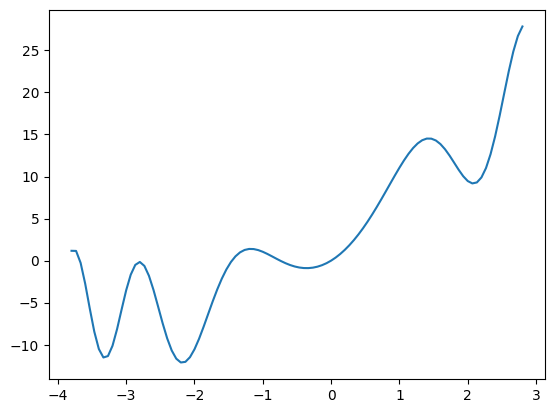

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

def f(x):
    return x**2 + 5*x + 6*np.sin(x**2)
x = np.linspace(-3.8, 2.8, 100)
y = f(x)
plt.plot(x, y)
plt.show()

In [25]:
def daoham(x):
    return (f(x+0.0001) - f(x))/0.0001
# phương trình f(x) = x^2 + 5x + 6sin(x^2)
# f'(x) = 2x + 5 + 12x*cos(x^2), với x = 1 thì f'(1) = 2 + 5 + 12*cos(1) = 7 + 12*cos(1) = 7 + 12*0.5403 = 13.484
test_daoham = daoham(1)
test_daoham

13.483041942397023

Phải gọi là quá chuẩn luôn :D. Tiếp theo hãy cùng xem cách mà gradient descent hoạt động nhé:D

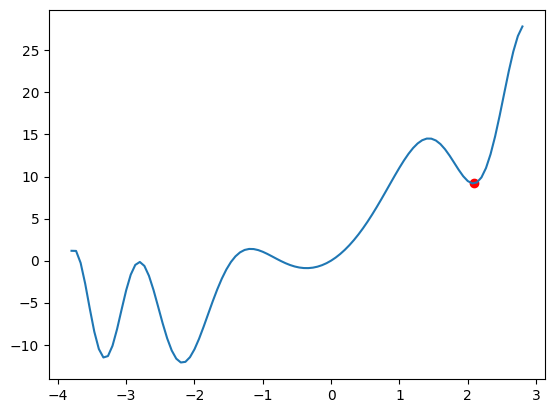

0.9418952665640745
Done


In [26]:
# khởi tạo giá trị ban đầu
a = 2.8
learning_rate = 0.001
for i in range(100):
    a = a - learning_rate*daoham(a)
    plt.plot(a, f(a), 'ro')
    clear_output(wait=True)
    plt.plot(x, y)
    plt.show()
    print(daoham(a))
    if daoham(a) < 1:
        break
print("Done")

Tuy nhiên, ta thấy rằng nhược điểm của gradient descent nguyên bản này là chỉ đưa ra cực tiểu của hàm số trên 1 khoảng khá nhỏ

Vì vậy mà chúng ta sẽ sử dụng thêm một kĩ thuật, đó là cho thêm momentum cho thằng grad des này:D

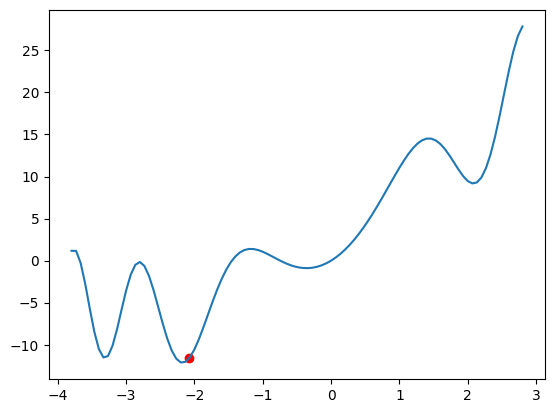

10.741520305046492
Done


In [27]:
# phiên bản momentum
a = 2.8
learning_rate = 0.001
# momentum là hệ số quán tính, giúp tăng tốc độ hội tụ, momentum càng lớn thì càng nhanh hội tụ
momentum = 0.95
# khởi tạo vận tốc ban đầu, chú ý vận tốc phải có chiều
v = 0
for i in range(100):
    v = momentum*v - learning_rate*daoham(a)
    a = a + v
    plt.plot(a, f(a), 'ro')
    clear_output(wait=True)
    plt.plot(x, y)
    plt.show()
    print(daoham(a))
print("Done")

Ta thấy rằng nếu tăng tốc độ khởi tạo hoặc tăng hệ số cho momentum, thậm chí nó còn phi luôn cả ra ngoài khoảng ta đang xét :D

Tiếp theo, ta hãy tìm hiểu về chain rule, chain rule là công thức tính đạo hàm của hàm hợp, công thức này rất quan trọng trong việc tính đạo hàm của hàm số phức tạp.
    
- Ví dụ: 
f(x) = sin(x^2), g(x) = x^2, h(x) = sin(x), f(x) = h(g(x))
=> f'(x) = h'(g(x))*g'(x)
=> f'(x) = cos(x)*2x
    
Rất bá đạo phải không nào, mình sẽ viết dưới dạng các bạn được học ở trên trường
- df/dx = df/dg*dg/dx (Chú ý là chúng ta có thể kéo dài chain rule cho nhiều hàm hợp hơn nữa nhé:D)

OKE, quay lại với backpropagation, backpropagation là quá trình tính toán đạo hàm của hàm mất mát theo các tham số của mô hình, quá trình này sẽ giúp chúng ta cập nhật các tham số sao cho mô hình đạt hiệu suất tốt nhất.

Việc cập nhật tham số sẽ dựa trên gradient descent, một thuật toán tối ưu hóa giúp tìm ra giá trị nhỏ nhất của hàm mất mát.
    Công thức cập nhật tham số: theta = theta - learning_rate*df/dtheta (theta là tham số cần cập nhật)

Thử với một ví dụ nhỏ nhé
Ta có phương trình từ forward:
- y_pred = w*x + b với w được khởi tạo là 0.5, b được khởi tạo là 0.1
- input x là 1 vector có giá trị là [1,2,3], output y là 1 vector có giá trị là [2,3,4]
- ta có hàm mất mát: loss = (y - y_pred)^2
- ta có đạo hàm của hàm mất mát: dloss/dy_pred = 2*(y - y_pred)
- ta có đạo hàm của y_pred theo w: dy_pred/dw = x
- ta có đạo hàm của y_pred theo b: dy_pred/db = 1
- ta có đạo hàm của hàm mất mát theo w: dloss/dw = dloss/dy_pred*dy_pred/dw = 2*(y - y_pred)*x
- ta có đạo hàm của hàm mất mát theo b: dloss/db = dloss/dy_pred*dy_pred/db = 2*(y - y_pred)

Ta có công thức cập nhật tham số:
- w = w - learning_rate*dloss/dw
- b = b - learning_rate*dloss/db
    
Với x = 1, y = 2, w = 0.5, b = 0.1:
- y_pred = w*x + b = 0.5*1 + 0.1 = 0.6
- loss = (y - y_pred)^2 = (2 - 0.6)^2 = 1.6
- dloss/dy_pred = 2*(y - y_pred) = 2*(2 - 0.6) = 2.8
- dloss/dw = 2.8*1 = 2.8
- dloss/db = 2.8*1 = 2.8
- w = 0.5 - 0.001*2.8 = 0.4972
- b = 0.1 - 0.001*2.8 = 0.0972
    
=>lần đầu lan truyền ngược, các tham số của neuron đầu tiên của layers 1 được cập nhập lại là: w = 0.4972, b = 0.0972
    
Quá trình này liên tục được lặp lại ở từng neuron trong từng layers cho đến khi hàm mất mát đạt giá trị nhỏ nhất, đó chính là quá trình học của mạng neuron.

Tiếp theo đây là phần code cơ bản

Ở đây mình import các thư viện cần sử dụng

In [28]:
import tensorflow as tf
from tensorflow import keras
import tqdm
import random
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

Tiếp theo, mình sử dụng GPU để tăng tốc đột training cho model

In [29]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
physical_devices

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Khởi tạo phương trình và tập dữ liệu

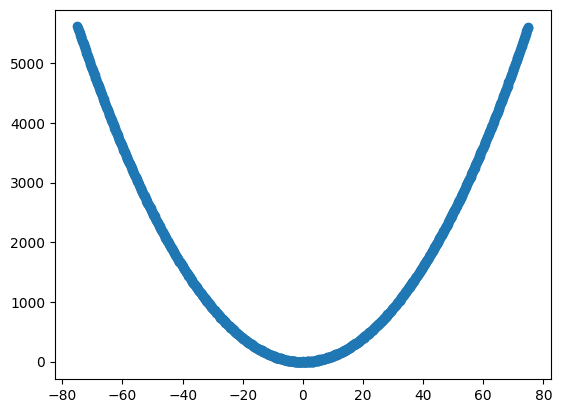

In [30]:
def f(x):
    return x**2 - 1
X = np.linspace(-75, 75, 1000)
Y = f(X) + np.random.normal(-5, 5, 1000)
plt.scatter(X, Y)
plt.show()

Chia bộ dữ liệu ra, các phương pháp khác như k-fold mình sẽ nói ở một bài nào đó khác nhé :D

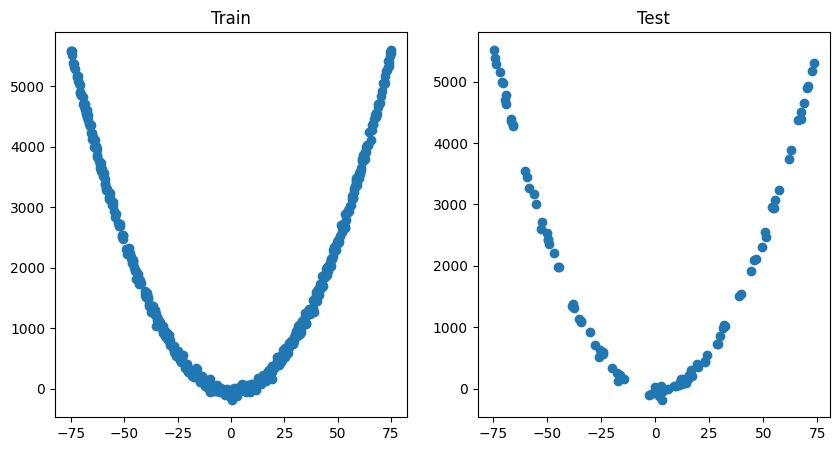

In [31]:
X_train = random.sample(list(X), 500)
Y_train = [f(x) + np.random.normal(-50, 50) for x in X_train]
X_test = random.sample(list(X), 100)
Y_test = [f(x) + np.random.normal(-50, 50) for x in X_test]
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_train, Y_train)
plt.title("Train")
plt.subplot(1, 2, 2)
plt.scatter(X_test, Y_test)
plt.title("Test")
plt.show()

Khởi tạo model Sequential

Giải thích:
- model = keras.Sequential(): tạo một mô hình neural network, trong đó Sequential() nghĩa là mô hình sẽ được xây dựng theo kiểu tuần tự, từ lớp này đến lớp khác.
- model.add: thêm một lớp vào mô hình.
- keras.layers.Dense(32, activation='relu', input_shape=(1,)): thêm một lớp Dense với 32 units, hàm kích hoạt là relu
- input_shape=(1,): đầu vào của mô hình là một số vô hướng.
- model.compile(optimizer='adam', loss='mean_squared_error'): biên dịch mô hình với optimizer là adam và hàm loss là mean_squared_error.
- model.summary(): hiển thị thông tin của mô hình. Total params là tổng số trọng số của mô hình. Trainable params là số trọng số có thể cập nhật trong quá trình huấn luyện, non-trainable params là số trọng số không thể cập nhật trong quá trình huấn luyện.
        
*CHÚ Ý: input_shape thường thêm dấu , ở cuối để biểu thị input_shape là một tuple. 
- Ví dụ: input_shape=(1,) nghĩa là input_shape là một tuple với một phần tử chứ không phải là một số vô hướng.
- input_shape = (2,3,) nghĩa là đầu vào của mô hình là một ma trận 2x3, còn dấu , ở cuối vẫn để biểu thị input_shape là một tuple.

Dưới đây là 1 model với 7 layers, 3 layers đầu có 256 neurons, 3 layers sau có 512 neurons, layer cuối là output với 1 neuron cùng hàm kích hoạt là linear. AE có thể sửa theo ý thích nhé, cái này mình cứ viết bừa vào mà train cũng ra gì đấy :D hehe


In [55]:
model = keras.Sequential()
model.add(keras.layers.Dense(256, activation='relu', input_shape=(1,)))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(1, activation='linear'))
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='mse')
model.summary()


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_88 (Dense)            (None, 256)               512       
                                                                 
 dense_89 (Dense)            (None, 256)               65792     
                                                                 
 dense_90 (Dense)            (None, 256)               65792     
                                                                 
 dense_91 (Dense)            (None, 512)               131584    
                                                                 
 dense_92 (Dense)            (None, 512)               262656    
                                                                 
 dense_93 (Dense)            (None, 512)               262656    
                                                                 
 dense_94 (Dense)            (None, 1)               

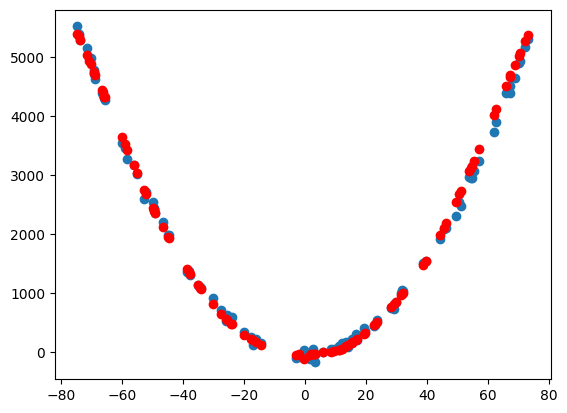

100%|██████████| 200/200 [01:03<00:00,  3.15it/s]


In [57]:
# Train the model (anh em chú ý, đây là quá trình train, nên sẽ mất thời gian, với ae chỉnh epoch tầm 200-300 là ổn)
epochs = 200
batch_size = 64
for i in tqdm.tqdm(range(epochs)):
    model.fit(X_train, Y_train, batch_size ,epochs=1)
    y_pred = model.predict(X_test)
    plt.scatter(X_test, Y_test)
    plt.scatter(X_test, y_pred, color='r')
    clear_output(wait=True)
    plt.show()